<a href="https://colab.research.google.com/github/Aijung10/Python_Examples/blob/master/CNN_dan_VGG16_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, DepthwiseConv2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

eval_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batch = train_datagen.flow_from_directory('/content/drive/My Drive/Datafix/Latih',
                                                 target_size = (224, 224), # should be same as the initialized one
                                                 batch_size = 32,
                                                 class_mode = 'binary')

val_batch = eval_datagen.flow_from_directory('/content/drive/My Drive/Datafix/Val',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_batch = test_datagen.flow_from_directory('/content/drive/My Drive/Datafix/Uji',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2)])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 55, 55, 128)       7

In [ ]:
# we create our own last layers

last_output = cnn.output

norm = BatchNormalization()(last_output)
x = Dropout(0.5)(norm)

flat = Flatten()(x) # Flattening the output from the previous layer
pred = Dense(1, activation='sigmoid', name='sigmoid')(flat) # we have 2 possibilites: Positive or Negative

newcn = Model(inputs=cnn.input, outputs=pred) # concatenates the layers

In [ ]:
newcn.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
 metrics=['accuracy'])

In [ ]:
start_time = time.perf_counter()

hist1 = newcn.fit(train_batch, batch_size = 32,
                  validation_data=val_batch, epochs=100,
                  verbose=1)

time1 = round(time.perf_counter() - start_time, 2)
print (f'\n\nTime taken by CNN: {time1} seconds')

Epoch 1/100
5/5 [==============================] - 85s 14s/step - loss: 0.7115 - accuracy: 0.5714 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/100
5/5 [==============================] - 1s 160ms/step - loss: 0.5849 - accuracy: 0.7214 - val_loss: 0.6869 - val_accuracy: 0.5500
Epoch 3/100
5/5 [==============================] - 1s 207ms/step - loss: 0.6053 - accuracy: 0.6714 - val_loss: 0.6844 - val_accuracy: 0.5250
Epoch 4/100
5/5 [==============================] - 1s 196ms/step - loss: 0.5603 - accuracy: 0.7143 - val_loss: 0.6834 - val_accuracy: 0.5250
Epoch 5/100
5/5 [==============================] - 1s 207ms/step - loss: 0.4942 - accuracy: 0.7714 - val_loss: 0.6821 - val_accuracy: 0.5500
Epoch 6/100
5/5 [==============================] - 1s 162ms/step - loss: 0.5246 - accuracy: 0.7643 - val_loss: 0.6809 - val_accuracy: 0.5500
Epoch 7/100
5/5 [==============================] - 1s 161ms/step - loss: 0.4930 - accuracy: 0.8000 - val_loss: 0.6792 - val_accuracy: 0.5500
Epoch 8/100
5/

# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False # we dont train the existing weights

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# we create our own last layers

last_output = vgg.output

norm = BatchNormalization()(last_output)
x = Dropout(0.5)(norm)

flat = Flatten()(x) # Flattening the output from the previous layer
pred = Dense(1, activation='sigmoid', name='sigmoid')(flat) # we have 2 possibilites: Positive or Negative

newgg = Model(inputs=vgg.input, outputs=pred) # concatenates the layers

In [ ]:
newgg.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
 metrics=['accuracy'])

In [ ]:
start_time = time.perf_counter()

hist2 = newgg.fit(train_batch,
                      validation_data=val_batch, epochs=100,
                      verbose=1)

time1 = round(time.perf_counter() - start_time, 2)
print (f'\n\nTime taken by VGG16: {time1} seconds')

Epoch 1/100
5/5 [==============================] - 15s 3s/step - loss: 0.9662 - accuracy: 0.5500 - val_loss: 0.6915 - val_accuracy: 0.4750
Epoch 2/100
5/5 [==============================] - 1s 222ms/step - loss: 0.7386 - accuracy: 0.6214 - val_loss: 0.6765 - val_accuracy: 0.5250
Epoch 3/100
5/5 [==============================] - 1s 245ms/step - loss: 0.8695 - accuracy: 0.5714 - val_loss: 0.6702 - val_accuracy: 0.5250
Epoch 4/100
5/5 [==============================] - 1s 216ms/step - loss: 0.6899 - accuracy: 0.6429 - val_loss: 0.6562 - val_accuracy: 0.5750
Epoch 5/100
5/5 [==============================] - 1s 221ms/step - loss: 0.6520 - accuracy: 0.6500 - val_loss: 0.6367 - val_accuracy: 0.6750
Epoch 6/100
5/5 [==============================] - 1s 222ms/step - loss: 0.5739 - accuracy: 0.7214 - val_loss: 0.6221 - val_accuracy: 0.7250
Epoch 7/100
5/5 [==============================] - 1s 227ms/step - loss: 0.5525 - accuracy: 0.6857 - val_loss: 0.6169 - val_accuracy: 0.7250
Epoch 8/100
5/5

# Accuracy Comparison

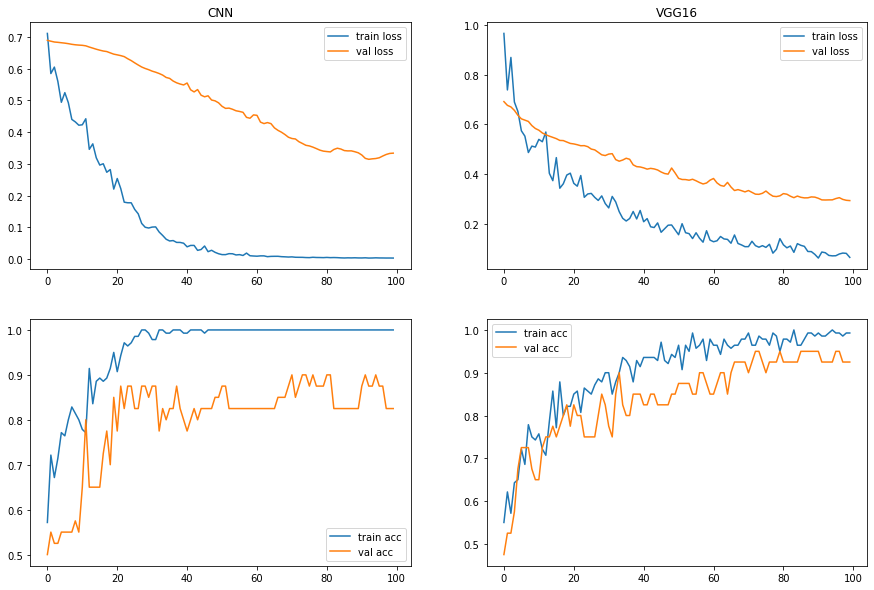

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=[15, 10])

axs[0,0].plot(hist1.history['loss'], label='train loss')
axs[0,0].plot(hist1.history['val_loss'], label='val loss')
axs[0,0].set_title('CNN')
axs[0,0].legend()

axs[1,0].plot(hist1.history['accuracy'], label='train acc')
axs[1,0].plot(hist1.history['val_accuracy'], label='val acc')
axs[1,0].legend()

axs[0,1].plot(hist2.history['loss'], label='train loss')
axs[0,1].plot(hist2.history['val_loss'], label='val loss')
axs[0,1].set_title('VGG16')
axs[0,1].legend()

axs[1,1].plot(hist2.history['accuracy'], label='train acc')
axs[1,1].plot(hist2.history['val_accuracy'], label='val acc')
axs[1,1].legend()

In [ ]:
import numpy as np
from tensorflow import keras

print (np.mean(hist1.history['accuracy']))
print (np.mean(hist1.history['val_accuracy']))
print (np.mean(hist1.history['loss']))
print (np.mean(hist1.history['val_loss']))

print (np.mean(hist2.history['accuracy']))
print (np.mean(hist2.history['val_accuracy']))
print (np.mean(hist2.history['loss']))
print (np.mean(hist2.history['val_loss']))

0.9582142871618271
0.8009999942779541
0.11478844987461344
0.49575507402420044
0.9037857156991959
0.8402500012516976
0.24266843374818564
0.4201069700717926


In [ ]:
class_names = ['Kanker','Normal']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

{'Kanker': 0, 'Normal': 1}


In [ ]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names_label))
    plt.xticks(tick_marks, class_names_label, rotation=45)
    plt.yticks(tick_marks, class_names_label)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 [==============================] - 0s 153ms/step


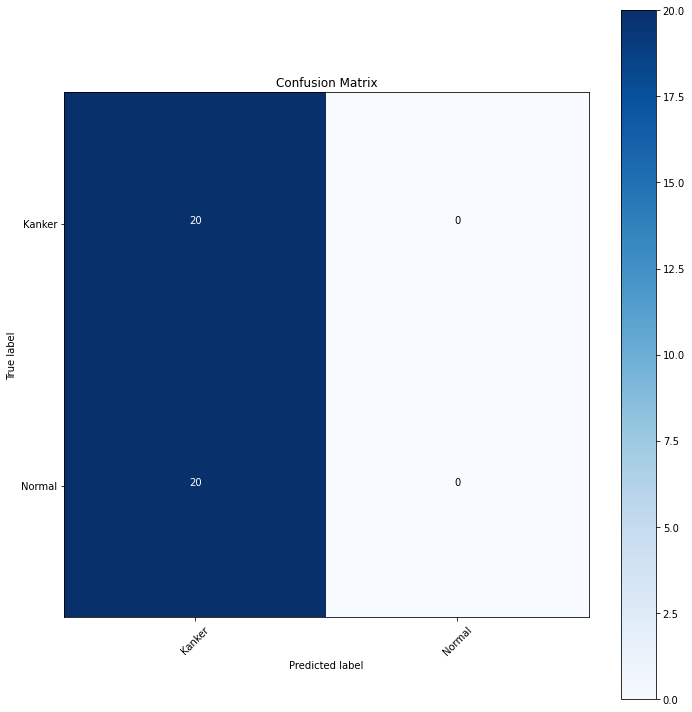

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

#On test dataset
Y_pred = newgg.predict(val_batch)
y_pred = np.argmax(Y_pred, axis=1)
target_names = class_names_label

#Confution Matrix
cm = confusion_matrix(val_batch.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

plt.show()

2/2 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

      Kanker       0.50      1.00      0.67        20
      Normal       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



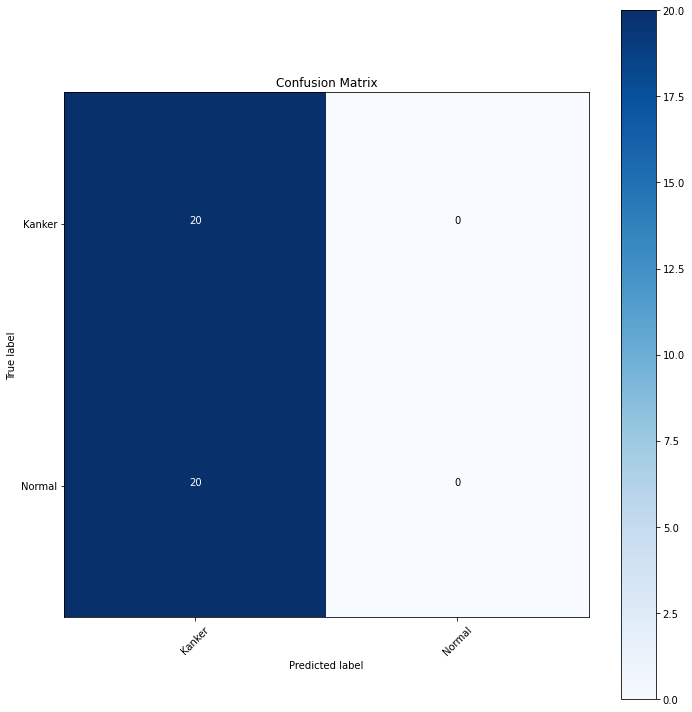

In [ ]:
# Some reports
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

#On test dataset
Y_pred = newcn.predict(val_batch)
y_pred = np.argmax(Y_pred, axis=1)
target_names = class_names_label

#Confution Matrix
cm = confusion_matrix(val_batch.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print(classification_report(val_batch.classes, y_pred, target_names=target_names))